In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import nltk 
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

nvidia = pd.read_csv('/content/drive/MyDrive/nvidia.csv')
tesla = pd.read_csv('/content/drive/MyDrive/Tesla.csv')
microsoft = pd.read_csv('/content/drive/MyDrive/microsoft.csv')

In [ ]:
nvidia.head()

,date,close,volume,neg,neu,pos,compound
0,2021-03-10,498.730011,9599800,0.091,0.767,0.142,0.1779
1,2021-03-11,519.739990,7486100,0.085,0.826,0.088,0.0258
2,2021-03-12,514.239990,6094900,0.091,0.767,0.142,0.1779
3,2021-03-15,527.650024,5549700,0.085,0.826,0.088,0.0258
4,2021-03-16,531.650024,6771200,0.091,0.767,0.142,0.1779


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/nvidia.csv')

In [ ]:
df=df.drop(['volume'],1).drop(['date'],1)

In [ ]:
df.head()

,close,neg,neu,pos,compound
0,498.730011,0.091,0.767,0.142,0.1779
1,519.739990,0.085,0.826,0.088,0.0258
2,514.239990,0.091,0.767,0.142,0.1779
3,527.650024,0.085,0.826,0.088,0.0258
4,531.650024,0.091,0.767,0.142,0.1779


In [ ]:
import numpy as np

In [ ]:
def normalize_data(dataset):
        cols = dataset.columns.tolist()
        col_name = [0]*len(cols)
        for i in range(len(cols)):
            col_name[i] = i
        dataset.columns = col_name
        dtypes = dataset.dtypes.tolist()
        minmax = list()
        for column in dataset:
            dataset = dataset.astype({column: 'float32'})
        for i in range(len(cols)):
            col_values = dataset[col_name[i]]
            value_min = min(col_values)
            value_max = max(col_values)
            minmax.append([value_min, value_max])
        for column in dataset:
            values = dataset[column].values
            for i in range(len(values)):
                values[i] = (values[i] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])
            dataset[column] = values
        dataset[column] = values
        return dataset,minmax
    
dataset,minmax = normalize_data(df)
print(df.values)
values = dataset.values

[[4.98730011e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.19739990e+02 8.50000000e-02 8.26000000e-01 8.80000000e-02
  2.58000000e-02]
 [5.14239990e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.27650024e+02 8.50000000e-02 8.26000000e-01 8.80000000e-02
  2.58000000e-02]
 [5.31650024e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.33650024e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.08899994e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.13830017e+02 8.50000000e-02 8.26000000e-01 8.80000000e-02
  2.58000000e-02]
 [5.27450012e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.22830017e+02 9.10000000e-02 7.67000000e-01 1.42000000e-01
  1.77900000e-01]
 [5.05720001e+02 8.50000000e-02 8.26000000e-01 8.80000000e-02
  2.58000000e-02]
 [5.01410004e+02 0.00000000e+00 6.28000000e-01 3.72000000e-01
  9.45100000e-01]
 [5.13570007e+02 8.50000000e-02 8.260000

In [ ]:
def split_sequences(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
def data_setup(n_steps, n_seq,sequence):
    X, y = split_sequences(sequence, n_steps)
    n_features = X.shape[2]
    X = X.reshape((len(X),n_steps, n_features))
    new_y = []
    for term in y:
        new_term = term[-1]
        new_y.append(new_term)
    return X, np.array(new_y), n_features
n_steps = 10
n_seq = 10000
rel_test_len = 0.1
X,y,n_features = data_setup(n_steps,n_seq,values)
X = X[:-1]
y = y[1:]
X_test,y_test = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len)]
X_train,y_train = X[int(len(X)*rel_test_len):],y[int(len(X)*rel_test_len):]
X.shape

(11, 10, 5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(64, activation=None, input_shape=(10,4), return_sequences = True))
model.add(LSTM(32, activation=None, return_sequences = True))
model.add(Flatten())
model.add(Dense(100, activation=None))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(10,4)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

In [ ]:
import os
from keras import callbacks
epochs = 1000
verbosity = 2
dirx = '/content/drive/MyDrive'
os.chdir(dirx)

h5 = 'network.h5'
checkpoint = callbacks.ModelCheckpoint(h5,
                                       monitor='val_loss',
                                       verbose=0,
                                       save_best_only=True,
                                       save_weights_only=True,
                                       mode='auto',
                                       period=1)
callback = [checkpoint]
json = 'network.json'
model_json = model.to_json()
with open(json, "w") as json_file:
    json_file.write(model_json)
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=len(X_train) // 4,
                    validation_data = (X_test,y_test),
                    verbose=verbosity, callbacks=callback)
from keras.models import load_model, model_from_json
def load_keras_model(optimizer):
    dirx = '/content/drive/MyDrive'
    os.chdir(dirx)
    json_file = open('Convnet.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    model.compile(optimizer=optimizer, loss='mse')
    model.load_weights('Convnet.h5')
    return model
model = load_keras_model('adam')

Epoch 1/1000


ValueError: ignored

In [ ]:
df.head()

,0,1,2,3,4
0,498.730011,0.091,0.767,0.142,0.1779
1,519.739990,0.085,0.826,0.088,0.0258
2,514.239990,0.091,0.767,0.142,0.1779
3,527.650024,0.085,0.826,0.088,0.0258
4,531.650024,0.091,0.767,0.142,0.1779


In [ ]:
def split_sequences(a, n_steps):
  X, y =list(), list()
  for i in range(len(a)):
    end_ix = i + n_steps
    if end_ix > len(a)-1:
      break
    seq_x, seq_y = a[i:end_ix], a[end_ix]
    X.append(seq_x)
    y.append(seq_y)
    return np.array(X), np.array(y)

def data_setup(a, n_steps):
  X, y = split_sequences(a, n_steps)
  n_features = X.shape[2]
  X = X.reshape((len(X), n_steps, n_features))
  new_y = []
  for term in y:
    new_term = term[-1]
    new_y.append(new_term)
  return X, np.array(new_y), n_features
n_steps = 10
n_seq = 10000
rel_test_len = 0.1
X,y,n_features = data_setup(n_steps,n_seq,values)
X = X[:-1]
y = y[1:]
X_test, y_test = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len)]
X_train, y_train = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len):]
X.shape

TypeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
result= pd.read_csv('/content/drive/MyDrive/nvidia.csv')

In [ ]:
result.head()

,n_of_page,principal_url,internal_urls,internals_dates,internals_text,internals_text_split_by_dot,sentimental_analysis_split_by_dot,sentimental_analysis_split_by_dot_average,sentimental_analysis_complete_text
time,,,,,,,,,
2010-04-01 14:23:00-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-04-01T14:23:00-04:00,Microsoft Corp.’s marathon legal battle with T...,"[Microsoft Corp, ’s marathon legal battle with...","[-0.2732, 0.7506, -0.6808, -0.4404, 0.9186, -0...",-0.0262,0.4118
2010-04-07 08:04:00-04:00,4,https://business.financialpost.com/page/4?s=mi...,https://business.financialpost.com/investing/t...,2010-04-07T08:04:00-04:00,While Apple Inc. is providing a sneak peak of ...,"[While Apple Inc, is providing a sneak peak o...","[0.128, 0.4728, -0.0258, 0.5267, -0.296]",0.1611,0.7916
2010-05-11 12:20:00-04:00,7,https://business.financialpost.com/page/7?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T12:20:00-04:00,Just five months left to wait for Xbox fans. ...,"[Just five months left to wait for Xbox fans, ...","[0.2263, 0.4215, 0.5499, 0.3612, 0.3425, 0.4215]",0.3871,0.9540
2010-05-11 14:28:00-04:00,1,https://business.financialpost.com/page/1?s=mi...,https://business.financialpost.com/technology/...,2010-05-11T14:28:00-04:00,As the US$290-million legal battle between i4i...,[As the US$290-million legal battle between i4...,"[-0.2732, 0.7506, -0.4019, 0.4404, -0.2023, 0....",0.0580,0.8451
2010-05-27 13:19:38-04:00,2,https://business.financialpost.com/page/2?s=mi...,https://business.financialpost.com/technology/...,2010-05-27T13:19:38-04:00,News that Apple has officially become the worl...,[News that Apple has officially become the wor...,"[0.3612, 0.3612, 0.3612, 0.3612, 0.5574, 0.557...",0.4201,0.9789


In [ ]:
result.columns

Index(['date', 'close', 'volume', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [ ]:
y = result.close.values 
y = y.astype('float32')
y = np.reshape(y, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y)

In [ ]:
# extra information: features of the sentiment analysis
X = result.neg.values
X = X.astype('float32')
X = np.reshape(X, (-1, 1))

# training and testing settings (size)
percent_of_training = 0.7
train_size = int(len(y) * percent_of_training)
test_size = len(y) - train_size
# 
train_y, test_y = y[0:train_size,:], y[train_size:len(y),:]
train_x, test_x = X[0:train_size,:], X[train_size:len(X),:]



def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
look_back = 5
# features of the original time serie (y)
X_train_features_1, y_train = create_dataset(train_y, look_back)
X_test_features_1, y_test = create_dataset(test_y, look_back)


# calculate extra features in (X)
X_train_features_2, auxiliar_1 = create_dataset(train_x, look_back)
X_test_features_2, auxiliar_2 = create_dataset(test_x, look_back)


# join the all the features in one
## reshape arrays
X_train_features_1 = np.reshape(X_train_features_1, (X_train_features_1.shape[0], 1, X_train_features_1.shape[1]))
X_test_features_1  = np.reshape(X_test_features_1, (X_test_features_1.shape[0], 1, X_test_features_1.shape[1]))
X_train_features_2 = np.reshape(X_train_features_2, (X_train_features_2.shape[0], 1, X_train_features_2.shape[1]))
X_test_features_2  = np.reshape(X_test_features_2, (X_test_features_2.shape[0], 1, X_test_features_2.shape[1]))
## put all together
X_train_all_features = np.append(X_train_features_1,X_train_features_2,axis=1)
X_test_all_features = np.append(X_test_features_1,X_test_features_2,axis=1)

In [ ]:
model = Sequential()
model.add(LSTM(200, input_shape=(X_train_all_features.shape[1], X_train_all_features.shape[2])))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_all_features,y_train, epochs=300, batch_size=100, 
                    validation_data=(X_test_all_features, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 200)               164800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 165,001
Trainable params: 165,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_predict = model.predict(X_train_all_features)
test_predict  = model.predict(X_test_all_features)




#train_predict = scaler.inverse_transform(train_predict)
#Y_train = scaler.inverse_transform(y_train)
#test_predict = scaler.inverse_transform(test_predict)
#Y_test = scaler.inverse_transform(y_test)


print('Train Mean Absolute Error:', mean_absolute_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_train,(y_train.shape[0],1)), train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(np.reshape(y_test,(y_test.shape[0],1)), test_predict[:,0])))

Train Mean Absolute Error: 0.102991305
Train Root Mean Squared Error: 0.12071004
Test Mean Absolute Error: 0.55295193
Test Root Mean Squared Error: 0.55295193


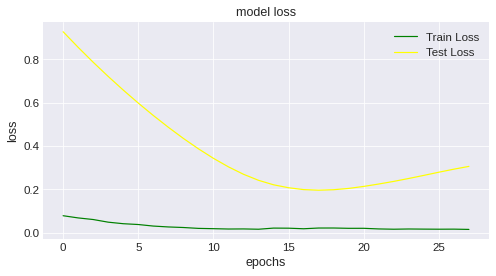

In [ ]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-dark')


plt.plot(history.history['loss'], label='Train Loss',color="green")
plt.plot(history.history['val_loss'], label='Test Loss',color = "yellow")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.grid()

plt.show();

In [ ]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

In [ ]:
time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[6:].index,columns= [""])


In [ ]:
train_predict

array([[0.21786039],
       [0.2338089 ],
       [0.22033772],
       [0.23689398],
       [0.25492477],
       [0.20959535],
       [0.17894295],
       [0.18596315],
       [0.19871171]], dtype=float32)

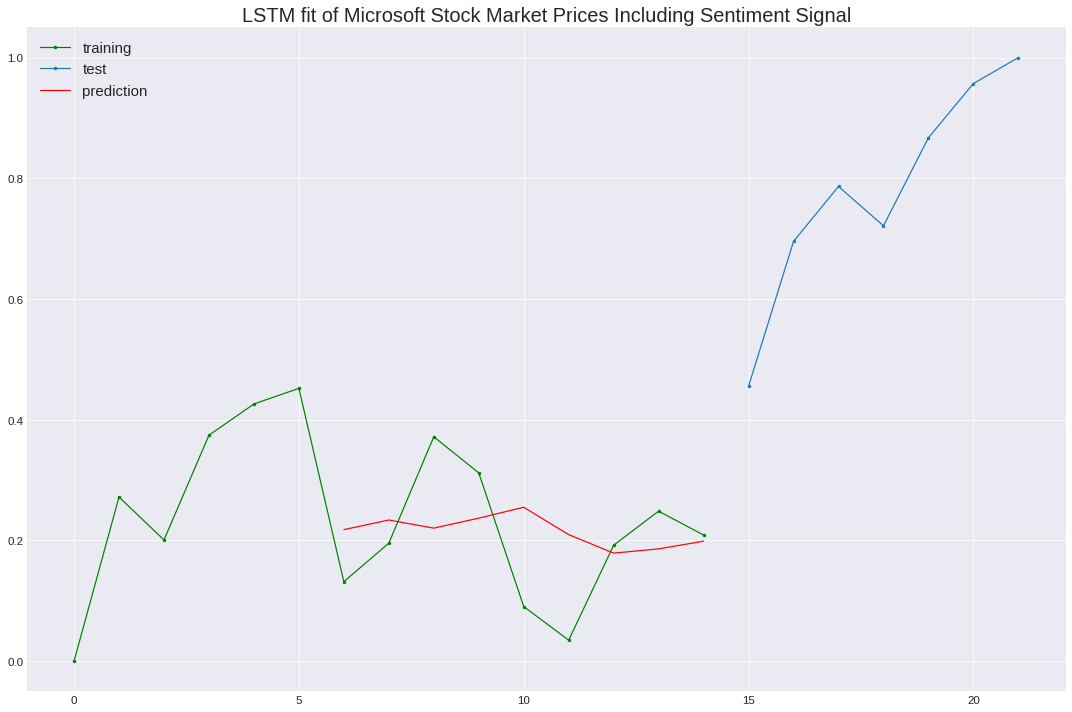

In [ ]:
plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")

plt.title("LSTM fit of Microsoft Stock Market Prices Including Sentiment Signal",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

In [ ]:
time_y_train = pd.DataFrame(data = train_y, index = result[0:train_size].index,columns= [""])
time_y_test  = pd.DataFrame(data = test_y, index = result[train_size:].index,columns= [""])

time_y_train_prediction = pd.DataFrame(data = train_predict, index = time_y_train[6:].index,columns= [""])
time_y_test_prediction  = pd.DataFrame(data = test_predict, index = time_y_test[:].index,columns= [""])


plt.style.use('seaborn-dark')
plt.figure(figsize=(15,10))

plt.plot(time_y_train,label = "training",color ="green",marker='.')
plt.plot(time_y_test,label = "test",marker='.')
plt.plot(time_y_train_prediction,color="red",label = "prediction")
plt.plot(time_y_test_prediction,color="blue")
plt.title("LSTM fit of Microsoft Stock Market Prices Including Sentiment Signal",size = 20)
plt.tight_layout()
sns.despine(top=True)
plt.ylabel('', size=15)
plt.xlabel('', size=15)
plt.legend(fontsize=15)
plt.grid()

plt.show();

ValueError: ignored

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/nvidias.csv')

In [ ]:
df.describe()

,close,neg,neu,pos,compound
count,22.0000,22.0000,22.0000,22.0000,22.0000
mean,530.3159,0.0753,0.7891,0.1350,0.1938
std,23.2693,0.0308,0.0589,0.0819,0.2975
min,498.7300,0.0000,0.6280,0.0880,0.0258
25%,513.9325,0.0850,0.7670,0.0880,0.0258
50%,525.1400,0.0850,0.8260,0.0880,0.0258
75%,547.8350,0.0910,0.8260,0.1420,0.1779
max,576.0000,0.0910,0.8260,0.3720,0.9451


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['close', 'neg', 'neu', 'pos', 'compound']
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

    close    neg    neu    pos  compound
0  0.0000 1.0000 0.7020 0.1901    0.1655
1  0.2719 0.9341 1.0000 0.0000    0.0000
2  0.2007 1.0000 0.7020 0.1901    0.1655
3  0.3743 0.9341 1.0000 0.0000    0.0000
4  0.4260 1.0000 0.7020 0.1901    0.1655
5  0.4519 1.0000 0.7020 0.1901    0.1655
6  0.1316 1.0000 0.7020 0.1901    0.1655
7  0.1954 0.9341 1.0000 0.0000    0.0000
8  0.3717 1.0000 0.7020 0.1901    0.1655
9  0.3119 1.0000 0.7020 0.1901    0.1655
10 0.0905 0.9341 1.0000 0.0000    0.0000
11 0.0347 0.0000 0.0000 1.0000    1.0000
12 0.1921 0.9341 1.0000 0.0000    0.0000
13 0.2485 0.0000 0.0000 1.0000    1.0000
14 0.2089 0.0000 0.9899 0.3099    0.8613
15 0.4555 0.9341 1.0000 0.0000    0.0000
16 0.6955 0.9341 1.0000 0.0000    0.0000
17 0.7865 0.9341 1.0000 0.0000    0.0000
18 0.7212 0.9341 1.0000 0.0000    0.0000
19 0.8672 0.9341 1.0000 0.0000    0.0000
20 0.9570 0.9341 1.0000 0.0000    0.0000
21 1.0000 0.9341 1.0000 0.0000    0.0000


In [ ]:
TEST_SIZE = 10

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [ ]:
def make_dataset(data, label, window_size=5):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
test.describe

<bound method NDFrame.describe of     close    neg    neu    pos  compound
12 0.1921 0.9341 1.0000 0.0000    0.0000
13 0.2485 0.0000 0.0000 1.0000    1.0000
14 0.2089 0.0000 0.9899 0.3099    0.8613
15 0.4555 0.9341 1.0000 0.0000    0.0000
16 0.6955 0.9341 1.0000 0.0000    0.0000
17 0.7865 0.9341 1.0000 0.0000    0.0000
18 0.7212 0.9341 1.0000 0.0000    0.0000
19 0.8672 0.9341 1.0000 0.0000    0.0000
20 0.9570 0.9341 1.0000 0.0000    0.0000
21 1.0000 0.9341 1.0000 0.0000    0.0000>

In [ ]:
import sklearn

In [ ]:
feature_cols = ['neg', 'neu', 'pos', 'compound']
label_cols = ['close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 5)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label,test_size=0.2)

x_train.shape, x_valid.shape
# ((6086, 16, 4), (1522, 16, 4))

# test dataset (실제 예측 해볼 데이터)
train_feature, train_label = make_dataset(train_feature, train_label, 10)
train_feature.shape, train.shape
# ((180, 16, 4), (180, 1))

((0,), (12, 5))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

IndexError: ignored

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

NameError: ignored